## Problem Statement - House Sales

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


From description we can infer that: 
    
    1. Average house price sold in King County USA, is $540088
    2. Max price of house sold in King County USA , is $7700000
    3. Average number of bedrooms in houses sold in King County USA is 3.  House with 2 bathrooms 
    4. Bedroom with one house is having 33 Bedrooms
    5. Average area of house is 2079 Sqft. with one house having 16513559 Sqft. area
    

In [8]:
#check the null values 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

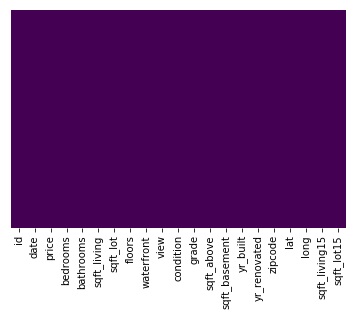

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False , cmap = 'viridis')

Above representation shows that our data does not have any null values

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

163 houses which has a view to a waterfront

In [12]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

19489 flats have not been viewed at all whereas 319 flats have been viewed already 4 times

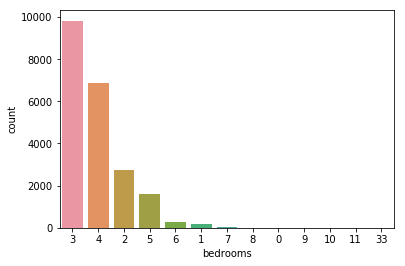

In [13]:
sns.countplot(df.bedrooms, order = df['bedrooms'].value_counts().index)

No handles with labels found to put in legend.
F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


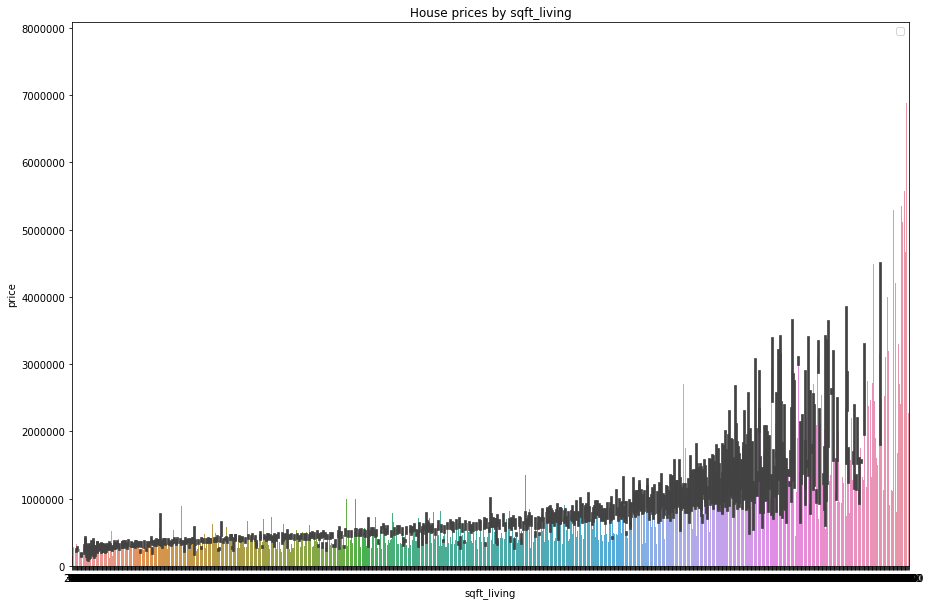

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='sqft_living', y='price', data = df)

No handles with labels found to put in legend.
F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


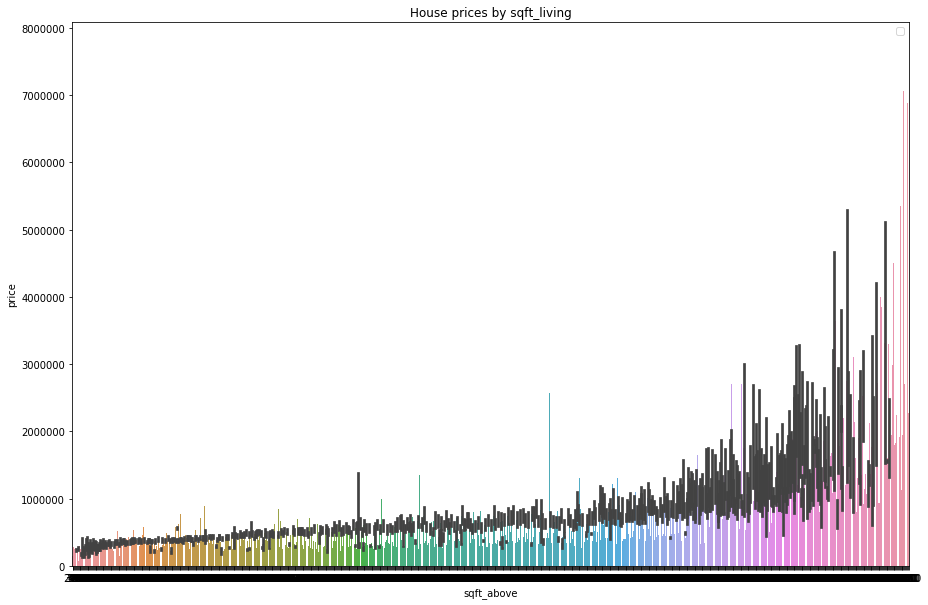

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('House prices by sqft_living')
plt.xlabel('sqft_above')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='sqft_above', y='price', data = df)

(array([1.825e+04, 3.255e+03, 1.010e+02, 5.000e+00, 2.000e+00]),
 array([  290.,  2940.,  5590.,  8240., 10890., 13540.]),
 <a list of 5 Patch objects>)

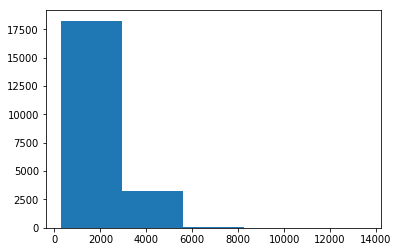

In [16]:
plt.hist('sqft_living', data = df, bins = 5)

Most of the houses are having living area of 3000 Sqft. To be precise 75% houses have area of 2550 Sqft (from above describe
function)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


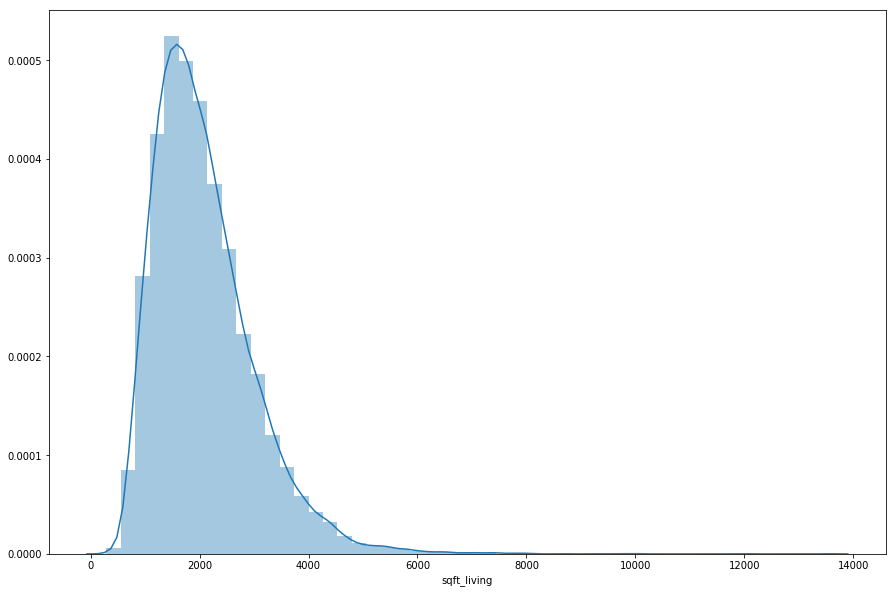

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


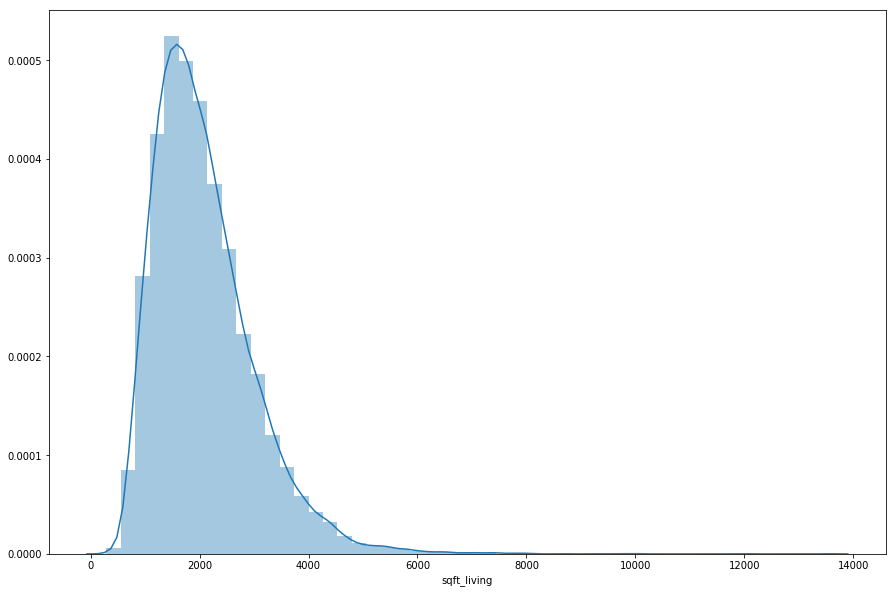

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

In [19]:
#Finding out mean, median & mode
print('Mean', round(df['sqft_living'].mean(), 2))
print('Median', df['sqft_living'].median())
print('Mode', df['sqft_living'].mode()[0])

Mean 2079.9
Median 1910.0
Mode 1300


In [20]:
len(df[df['sqft_living']==1300])

138

138 Houses having sqft_living area of 1300 Sqft The distribution is positively skewed with mean value greater than 
median and median being greater than mode

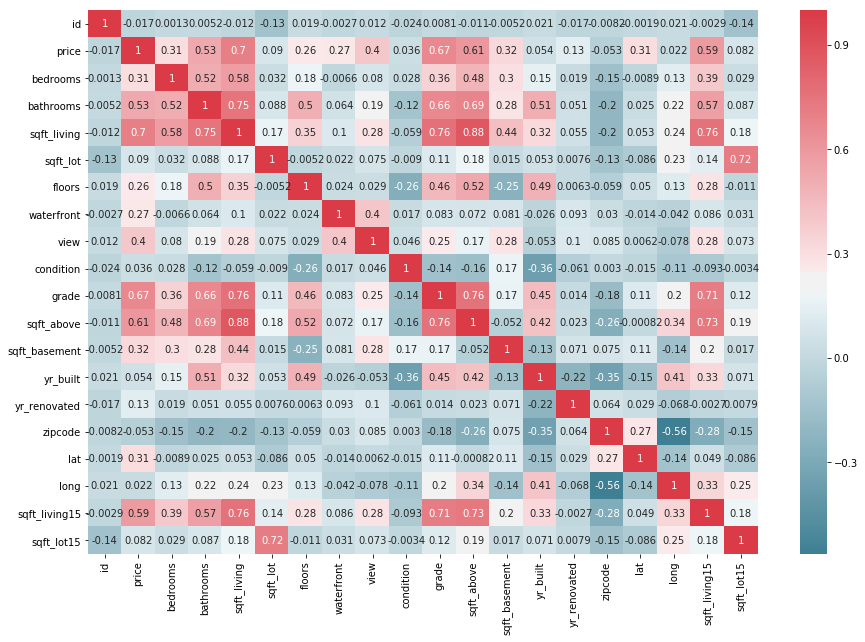

In [21]:
def correlation_heatmap(df1):
    _, ax = plt.subplots(figsize = (15, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(df.corr(), annot=True, cmap = colormap)

correlation_heatmap(df)

When we examine the correlation matrix, we may observe that price has the highest correlation coefficient with living area (sqft)
(0.7) We will use living area (sqft) as feature while creating regression When we model a linear relationship between a response
and just one explanatory variable, this is called simple linear regression.

In [22]:
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)
#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  254289.15
R-squared (training)  0.492
R-squared (testing)  0.496
Intercept:  [-47235.8113029]
Coefficient: [[282.2468152]]


F:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


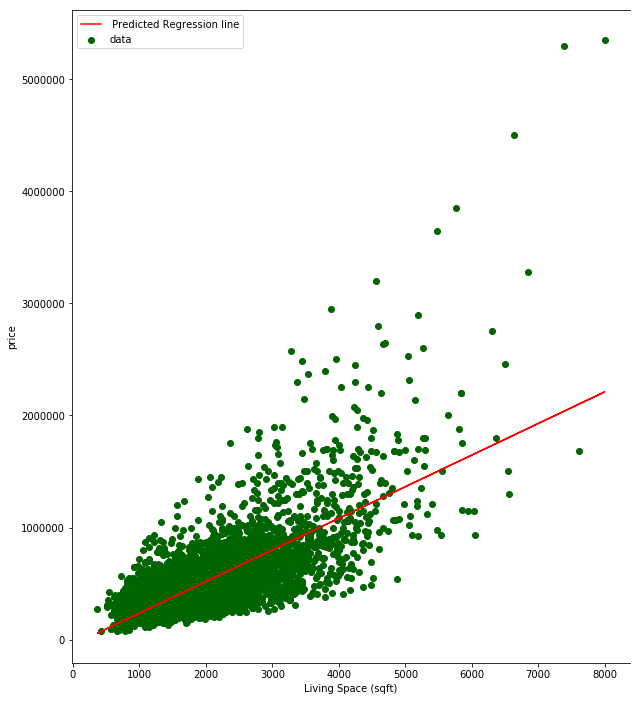

In [23]:
_, ax = plt.subplots(figsize= (10, 12))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In the this section I used a simple linear regression and found a poor fit.
In order to improve this model ,add more features but we should be careful about the overfit which can be seen by the difference 
between the training and test evaluation metrics. 

When we have more than one feature in a linear regression, it is defined as multiple regression.
Then, it is time to check the correlation matrix before fitting a mutiple regression.

Model 1

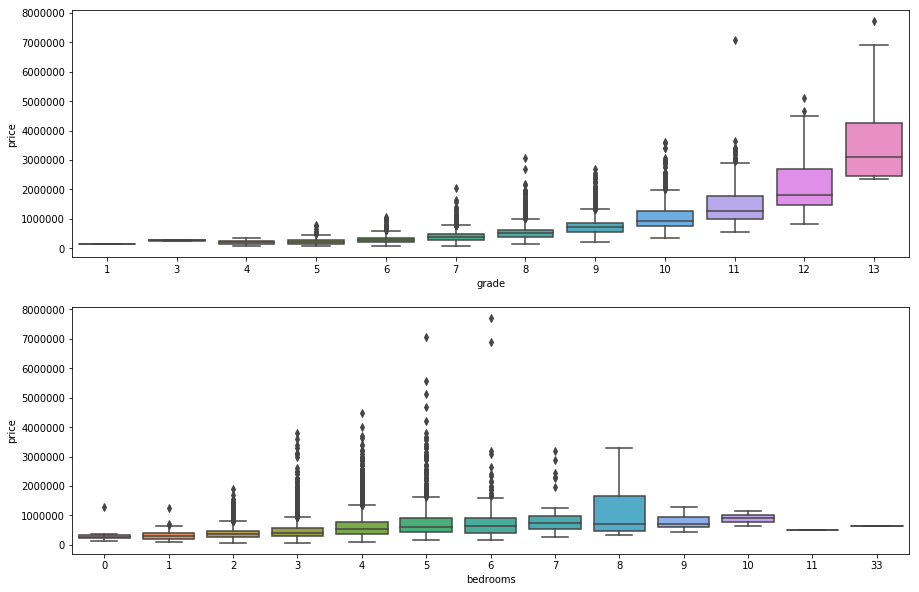

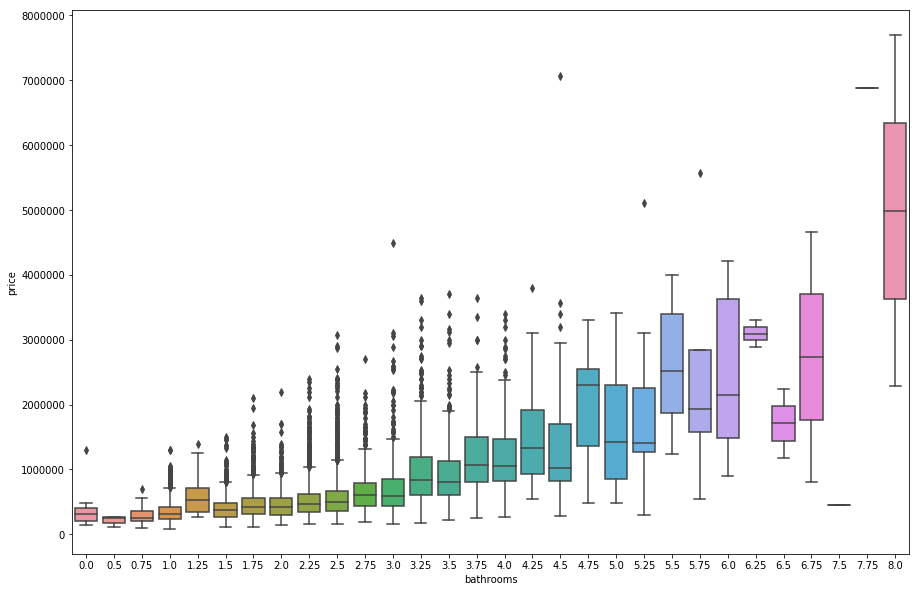

In [24]:
_ , axes = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(x= train_data['grade'], y=train_data['price'],ax = axes[0])
sns.boxplot(x=train_data['bedrooms'], y=train_data['price'], ax=axes[1])

_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'], y=train_data['price'])

In [25]:
features1 = ['bathrooms','sqft_living','grade', 'sqft_above']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Model 1')
print('------------------')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)


Model 1
------------------
Mean Squared Error (MSE)  240664.06
R-squared (training)  0.542
R-squared (testing)  0.549
Intercept:  -651696.694541989
Coefficient: [-3.77792711e+04  2.58159969e+02  1.14837469e+05 -8.06856461e+01]


In [26]:
features1 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg= linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred = reg.predict(test_data[features1])
print('Model 2')
print('------------------')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(train_data[features1], train_data['price']), 3))
print('R-squared (testing) ', round(reg.score(test_data[features1], test_data['price']), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Model 2
------------------
Mean Squared Error (MSE)  205244.56
R-squared (training)  0.655
R-squared (testing)  0.672
Intercept:  -32330182.911675815
Coefficient: [-2.62100082e+04 -3.47626774e+03  1.32069090e+02 -1.31506101e-01
 -3.22608866e+04  5.65731080e+05  6.81843494e+04  8.17559446e+04
  6.62246805e+01  6.58444098e+01  6.71765072e+05  4.60648979e+00]


#### Polynomial Regression

In [27]:
polyfeat = PolynomialFeatures(degree =2)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Model 3')
print('------------------')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Model 3
------------------
Mean Squared Error (MSE)  175811.82
R-squared (training)  0.758
R-squared (testing)  0.759


In [28]:
polyfeat = PolynomialFeatures(degree =3)
xtrain_poly=polyfeat.fit_transform(train_data[features1])
xtest_poly=polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
predp= poly.predict(xtest_poly)

print('Model 4')
print('------------------')
mean_squared_error = metrics.mean_squared_error(test_data['price'], predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train_data['price']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test_data['price']), 3))

Model 4
------------------
Mean Squared Error (MSE)  207502.25
R-squared (training)  0.776
R-squared (testing)  0.665


Model 3 has more R-squared score of 0.744, compared to other models. From above, I conclude Polynomial regression is best solution.